<a href="https://colab.research.google.com/github/Heytec/MachineLearning2/blob/master/keras_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df= pd.read_csv("/content/drive/My Drive/Google_colab_data/cancer_classification.csv")

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

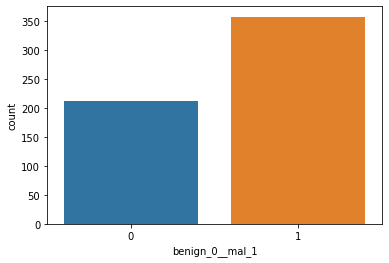

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

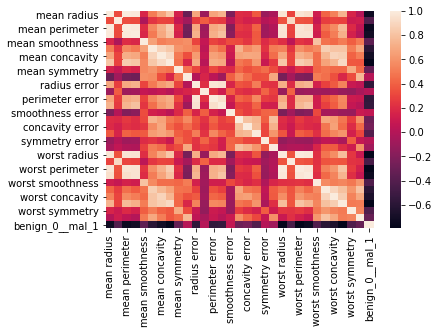

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

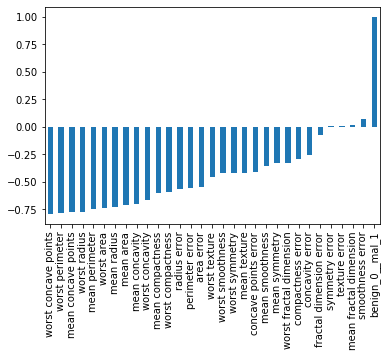

In [11]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [0]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [21]:
X_train.shape

(426, 30)

In [0]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 10s 23ms/sample - loss: 0.6860 - val_loss: 0.6740
Epoch 2/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6646 - val_loss: 0.6551
Epoch 3/600
426/426 [==============================] - 0s 92us/sample - loss: 0.6438 - val_loss: 0.6322
Epoch 4/600
426/426 [==============================] - 0s 91us/sample - loss: 0.6167 - val_loss: 0.6018
Epoch 5/600
426/426 [==============================] - 0s 100us/sample - loss: 0.5812 - val_loss: 0.5592
Epoch 6/600
426/426 [==============================] - 0s 92us/sample - loss: 0.5327 - val_loss: 0.5038
Epoch 7/600
426/426 [==============================] - 0s 86us/sample - loss: 0.4751 - val_loss: 0.4457
Epoch 8/600
426/426 [===========================

In [0]:
model_loss = pd.DataFrame(model.history.history)

In [25]:
model_loss

,loss,val_loss
0,0.686038,0.674021
1,0.664629,0.655136
2,0.643773,0.632169
3,0.616676,0.601802
4,0.581167,0.559219
...,...,...
595,0.007268,0.278498
596,0.008020,0.297221
597,0.008496,0.244770
598,0.007720,0.316699


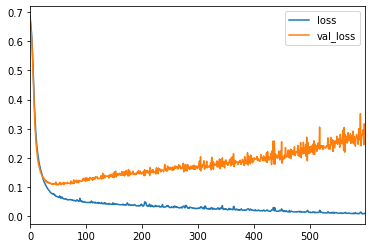

In [26]:
model_loss.plot()

In [0]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 436us/sample - loss: 0.6802 - val_loss: 0.6709
Epoch 2/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6605 - val_loss: 0.6518
Epoch 3/600
426/426 [==============================] - 0s 116us/sample - loss: 0.6370 - val_loss: 0.6270
Epoch 4/600
426/426 [==============================] - 0s 114us/sample - loss: 0.6098 - val_loss: 0.5996
Epoch 5/600
426/426 [==============================] - 0s 92us/sample - loss: 0.5755 - val_loss: 0.5603
Epoch 6/600
426/426 [==============================] - 0s 91us/sample - loss: 0.5356 - val_loss: 0.5156
Epoch 7/600
426/426 [==============================] - 0s 87us/sample - loss: 0.4891 - val_loss: 0.4650
Epoch 8/600
426/426 [==============================] - 0s 95us/sample - loss: 0.4412 - val_loss: 0.4123
Epoch 9/600
426/426 [==============================] - 0s 86us/sample - loss: 0.3908 - val_loss: 0.3639
Epoch 10/600
42

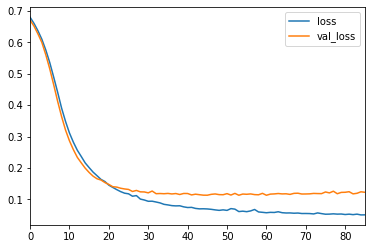

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 600us/sample - loss: 0.6962 - val_loss: 0.6753
Epoch 2/600
426/426 [==============================] - 0s 100us/sample - loss: 0.6790 - val_loss: 0.6594
Epoch 3/600
426/426 [==============================] - 0s 92us/sample - loss: 0.6791 - val_loss: 0.6436
Epoch 4/600
426/426 [==============================] - 0s 97us/sample - loss: 0.6532 - val_loss: 0.6229
Epoch 5/600
426/426 [==============================] - 0s 100us/sample - loss: 0.6309 - val_loss: 0.5927
Epoch 6/600
426/426 [==============================] - 0s 92us/sample - loss: 0.5930 - val_loss: 0.5658
Epoch 7/600
426/426 [==============================] - 0s 99us/sample - loss: 0.5827 - val_loss: 0.5276
Epoch 8/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5340 - val_loss: 0.4906
Epoch 9/600
426/426 [==============================] - 0s 91us/sample - loss: 0.4891 - val_loss: 0.4488
Epoch 10/600
42

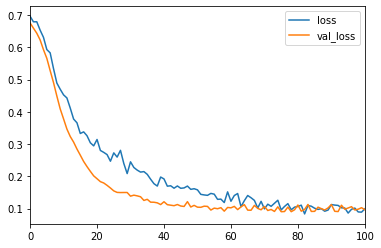

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [0]:
predictions = model.predict_classes(X_test)

In [39]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [40]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [44]:
print(accuracy_score(y_test,predictions))

0.9790209790209791
